# Phase Kickback

### Eigenvectors
Eigenvalues in quantum states are much simpler to understand, since the magnitude of our eigenvalueswill always be 1. Remember that 1 can be expressed as the imaginary number $e^{2 \pi i \theta}$. We can use the eigenvalues equation $A|x \rangle = \lambda |x \rangle$, where x is our qubit. Knowing that $\lambda = e^{2 \pi i \theta}$, we can write the equation for a quantum gate $U$ as: $U|x \rangle = e^{2\pi i \theta} | x \rangle$.

This means that if a fate rotates all the amplitudes of a state vector by the same amount, then that state is an __eigenstate__ of that gate.

### Controlled Gates and Eigenstates
In presentation 1, we reviewed the effects of gates on a qubit. Specifically recall the 3 Pauli Gates, $X, Y,$ and $Z$, and how each gate rotates the vector of a qubit $\pi $ radians (180 degrees) around the specific access on the bloch sphere. Below we show the effect of the $Z$ gate on the $| + \rangle$ ket:

In [22]:
from qiskit.visualization import plot_bloch_vector
import numpy as np
# plot_bloch_vector(bloch, title='', ax=None, figsize=None, coord_type='cartesian')
# bloch (list[double]): 3d list of coordinates: Cartesian [x, y, z], Spherical [r, theta, phi] where r is hte magnitude of the vector, theta is the inclination from +z, and phi is the azimuth from +x
# title (str): printed at top of figure
# ax (matplotlip.axes.Axes): used for rendering bloch sphere
# figsize (tuple): changes the size of the figure in inches
# coord_type (str): specifies coordinate type (cartesian or spherical)

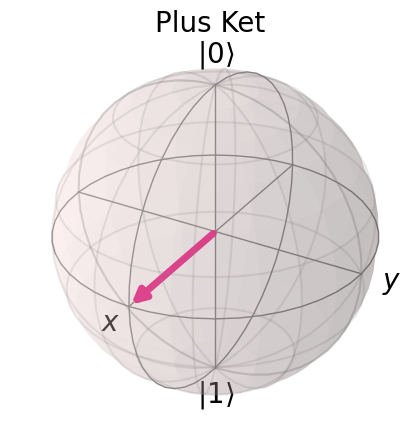

In [24]:
plot_bloch_vector([1, np.pi/2, 0], "Plus Ket", figsize=(4, 4, 4), coord_type='spherical')

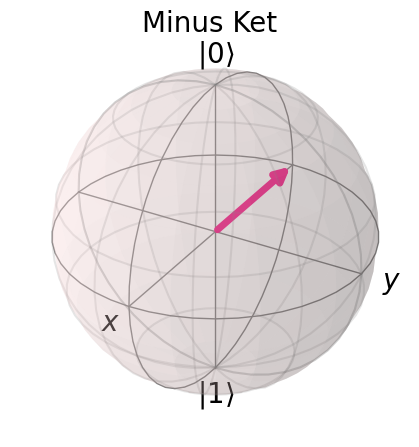

In [25]:
plot_bloch_vector([1, -np.pi/2, 0], "Minus Ket", figsize=(4, 4, 4), coord_type='spherical')

We now recall that applying the $Z$ gate to a $| + \rangle$ results in the $| - \rangle$. Remember that the difference between $| + \rangle$ and $| - \rangle$ is a change in phase, while the mplitudes of probabilities for 0 and 1 remain the same. Also recall, that applying a $Z$ gate on the $| 1 \rangle$ will again result in a phase shift, changing the phase from 0 to $\pi$.

Now lets take a look at the effects of applying a controlled-Z gate on different states of qubits:

$Z |10 \rangle = |10 \rangle$. If the control bit is $| 0 \rangle$, then there is no effect.
$Z| 11 \rangle = -|11 \rangle$. If the contrl bit is $| 1 \rangle$, then the gate introduces a global phase, but the states of the qubits are unchanged.
$| 1+ \rangle = |1 - \rangle$. If the control bit is in a state of superposition, the gate changes the relative phase between the $|0 \rangle$ and $|1 \rangle $ states of the control qubit. We can rewrite this equation as $CZ(\frac{|10 \rangle + |11 \rangle}{\sqrt{2}}) = \frac{|10 \rangle - |11 \rangle}{\sqrt{2}}$. 

We can check this outcome with the following matrix mulitplication:
\begin{gather*}
\begin{bmatrix}
1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 
\end{bmatrix}
\begin{bmatrix} 
0 \\ 0 \\ \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} 
\end{bmatrix} = 
\begin{bmatrix} 
0 \\ 0 \\ \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} 
\end{bmatrix}
\end{gather*}

NOTE: Controlled-Z = $CZ = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{bmatrix}$

This shows the first instance of phase kickback: When the control bit is in a state of superposition, $| + \rangle$, and the target bit is in the $|1 \rangle$ state, the phase of the control bit changes. More generally, if we have a quantum gate $U$, and it's eigenstate $|x \rangle$, then $U$ acting on $|x \rangle$ will have the effect of rotating the control qubit around the Z-axis by the angle of $\theta$.

In [32]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0, 1)
qc.draw()


┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

This circuit shows the input of $|+ - \rangle$ and will output $|- - \rangle$.